In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [4]:
start = '1996-01-01'
end = '2024-08-12'
stock = 'RELIANCE.NS'

data = yf.download(stock, start, end)
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-01-01,14.638248,14.716795,14.541850,14.691803,9.302443,52060684
1996-01-02,14.656100,14.727506,14.470444,14.577553,9.230103,84371654
1996-01-03,14.816763,15.491551,14.656100,14.688232,9.300182,104661939
1996-01-04,14.548991,14.595404,14.356194,14.552561,9.214279,108450132
1996-01-05,14.495436,14.495436,14.327632,14.452592,9.150983,83354233
...,...,...,...,...,...,...
2024-08-05,2960.000000,2967.800049,2866.500000,2894.649902,2894.649902,8523352
2024-08-06,2910.300049,2955.000000,2902.649902,2912.100098,2912.100098,5118093
2024-08-07,2938.000000,2945.000000,2923.000000,2929.649902,2929.649902,4087284


In [5]:
data.reset_index(inplace=True)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,14.638248,14.716795,14.541850,14.691803,9.302443,52060684
1,1996-01-02,14.656100,14.727506,14.470444,14.577553,9.230103,84371654
2,1996-01-03,14.816763,15.491551,14.656100,14.688232,9.300182,104661939
3,1996-01-04,14.548991,14.595404,14.356194,14.552561,9.214279,108450132
4,1996-01-05,14.495436,14.495436,14.327632,14.452592,9.150983,83354233
...,...,...,...,...,...,...,...
7179,2024-08-05,2960.000000,2967.800049,2866.500000,2894.649902,2894.649902,8523352
7180,2024-08-06,2910.300049,2955.000000,2902.649902,2912.100098,2912.100098,5118093
7181,2024-08-07,2938.000000,2945.000000,2923.000000,2929.649902,2929.649902,4087284
7182,2024-08-08,2915.050049,2930.000000,2891.850098,2898.250000,2898.250000,6193596


In [6]:
ma_100_days = data.Close.rolling(100).mean()

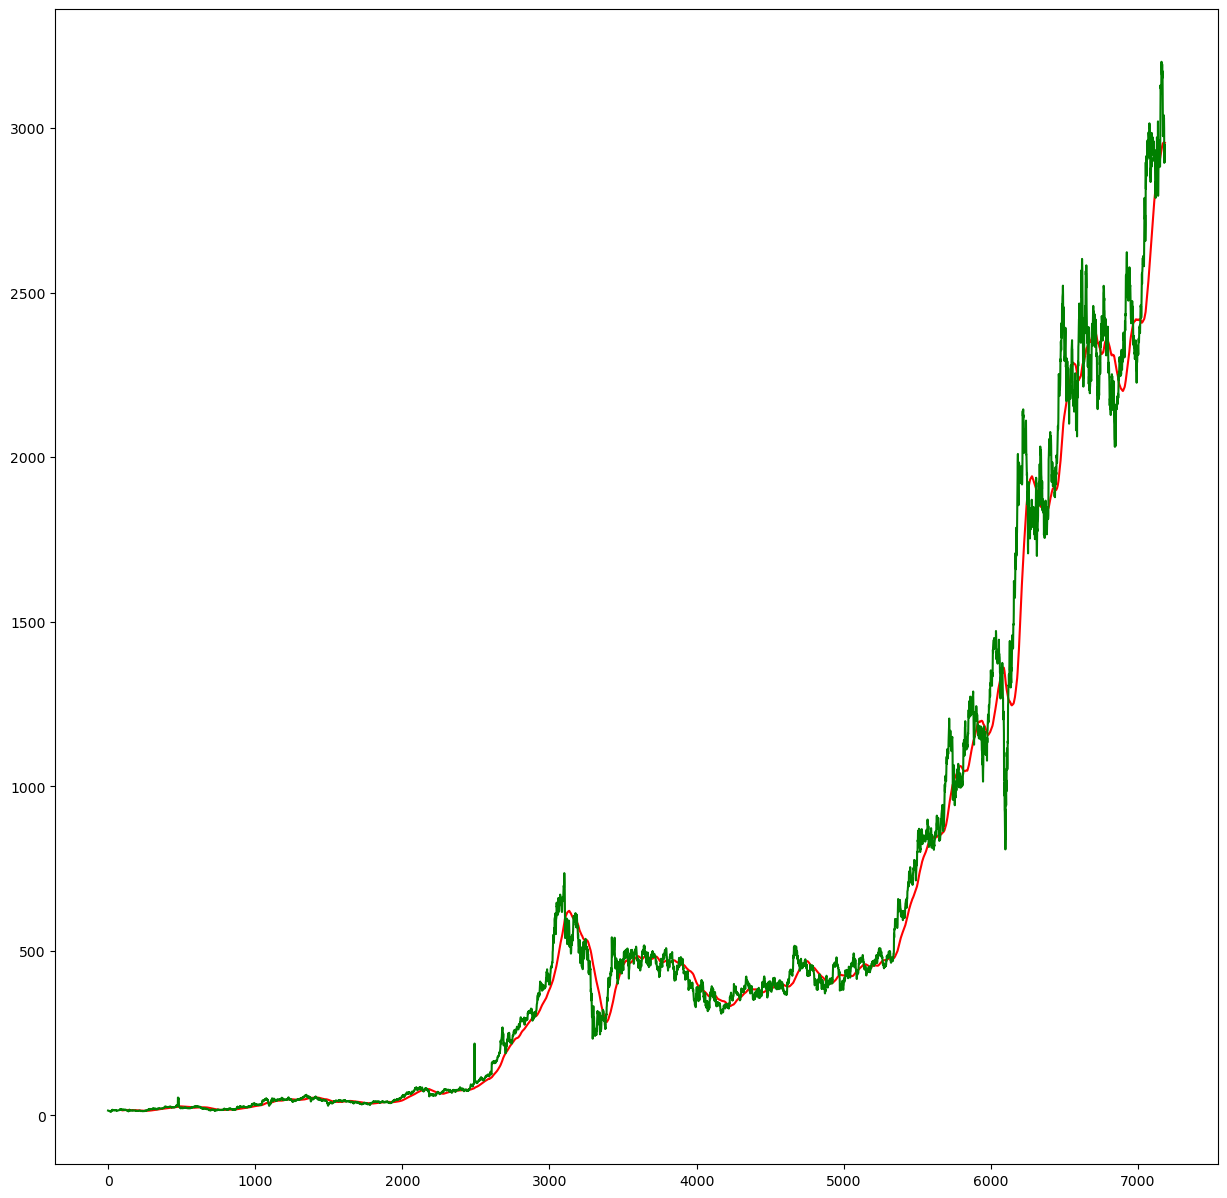

In [7]:
plt.figure(figsize=(15,15))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [13]:
ma_200_days = data.Close.rolling(200).mean()

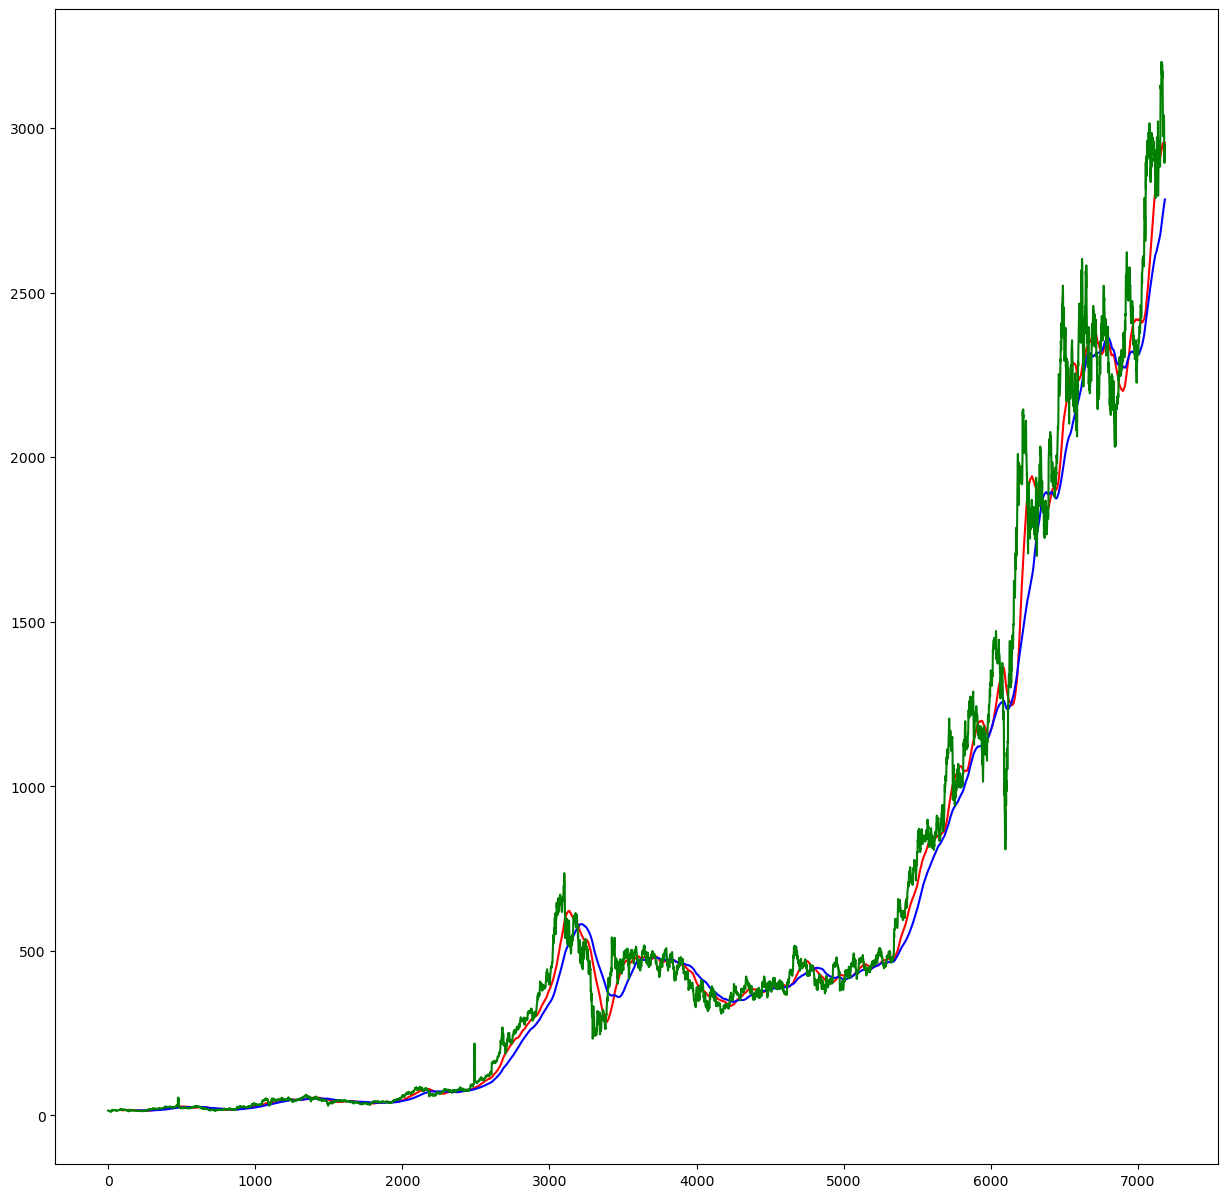

In [15]:
plt.figure(figsize=(15,15))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [17]:
data.dropna(inplace=True)

In [19]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [21]:
data_train.shape[0]

5747

In [23]:
data_test.shape[0]

1437

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [27]:
data_train_scale = scaler.fit_transform(data_train)

In [29]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

x, y = np.array(x), np.array(y)

In [31]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [33]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [35]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [42]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 28s 158ms/step - loss: 0.0012
Epoch 2/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 28s 161ms/step - loss: 0.0012
Epoch 3/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 28s 160ms/step - loss: 0.0012
Epoch 4/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 29s 161ms/step - loss: 0.0012
Epoch 5/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 29s 164ms/step - loss: 0.0012
Epoch 6/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 36910s 210s/step - loss: 0.0012
Epoch 7/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 51s 286ms/step - loss: 0.0012
Epoch 8/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 65s 191ms/step - loss: 0.0012
Epoch 9/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 44s 205ms/step - loss: 0.0012
Epoch 10/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 41s 230ms/step - loss: 0.0012
Epoch 11/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 28s 159ms/step - loss: 0.0011
Epoch 12/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 29s 161ms/step - loss: 0.0013
Epoch 13/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 28s 161ms/step - loss: 0.0012
Epoch 14/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 30s 169ms/step - loss: 0.0011
Epoch 15/50
1

In [44]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [46]:
pas_100_days = data_train.tail(100)

In [48]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)
data_test_scale  =  scaler.fit_transform(data_test)

In [50]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [52]:
y_predict = model.predict(x)

45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step


In [54]:
scale =1/scaler.scale_

In [56]:
y_predict = y_predict*scale

In [58]:
y = y*scale

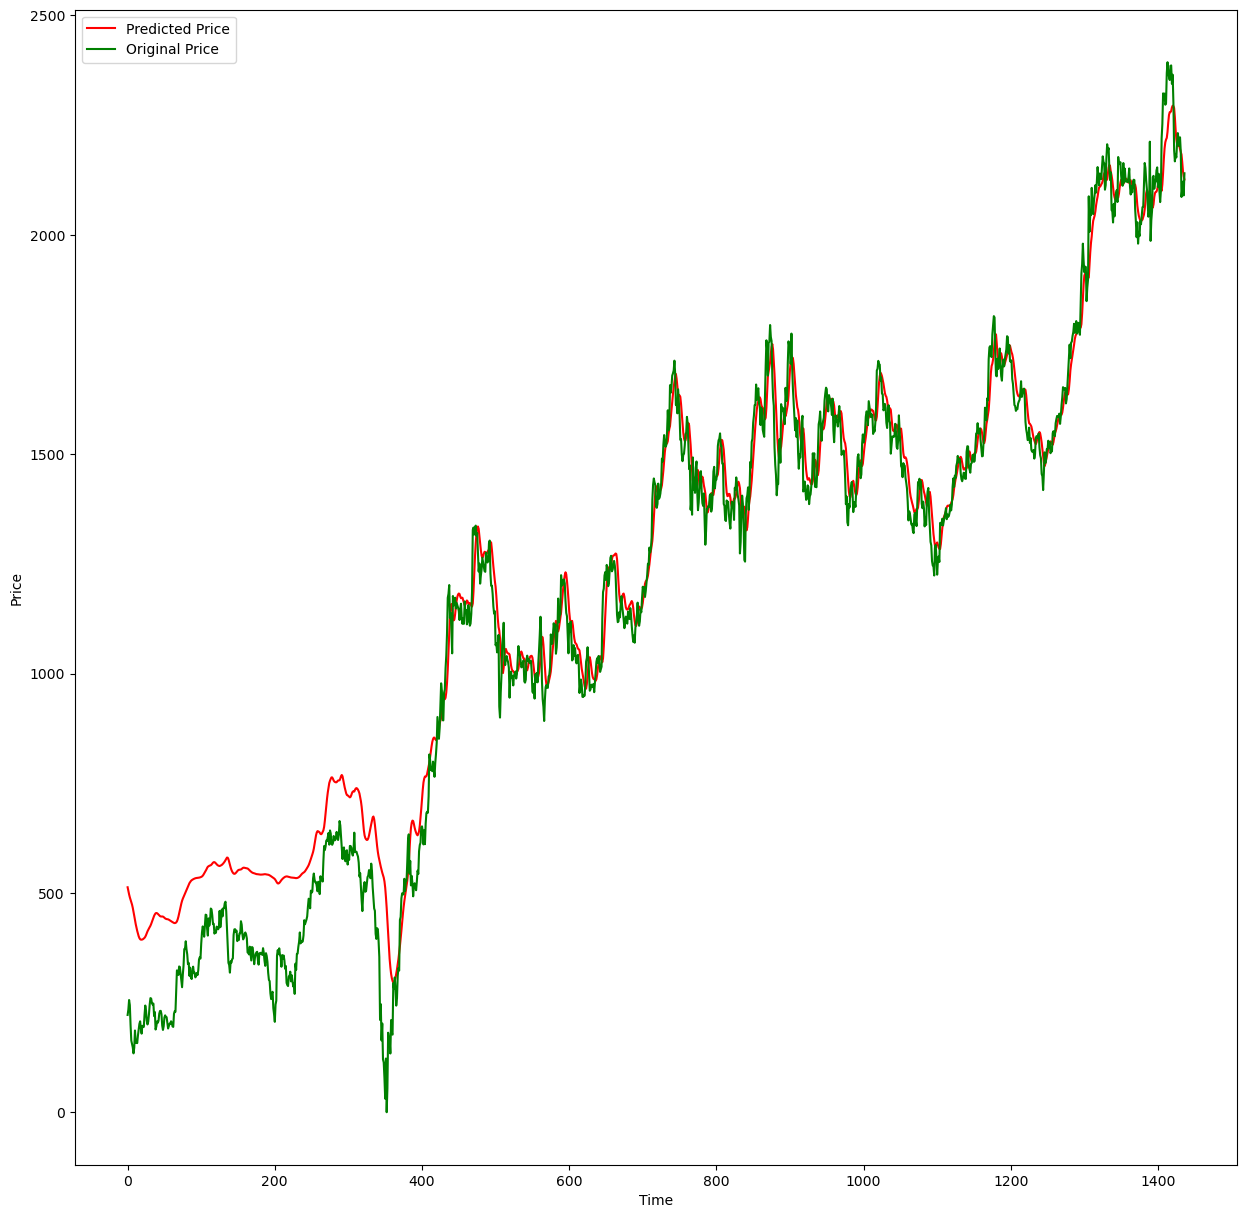

In [60]:
plt.figure(figsize=(15,15))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [62]:
model.save('Stock Predictions Model.keras')